In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../derrom/")

import derrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
trajectories = derrom.utils.load_trajectories(filename='../../trajectories_n_kmax=200.npz')

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

test_trajectory = derrom.utils.load_trajectories(filename='../../example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

1000 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [4]:
dim_reducer = derrom.dim_reducers.SVD()
scaler = derrom.scalers.normalize_scaler(0.1)
transformer = derrom.transformers.polynomial_features(order=2)
optimizer = derrom.optimizers.ridge(alpha=10.**-3.5)

model = derrom.derrom(trajectories, targets='AR', DE_l=2, intercept=True, full_hist=False, 
                      optimizer=optimizer,
                      scaler=scaler,
                      dim_reducer=dim_reducer,
                      NL_transformer=transformer)

train_kwargs = {'rdim':20}

scores = derrom.utils.get_KFold_CV_scores(model, trajectories, folds=10, seed=817,
                                          norms=['rms','max'],
                                          train_kwargs=train_kwargs)

print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )

rms error:  0.006368410212943511 +- 0.003989126710259439
max error:  0.031430886060373496 +- 0.022664622894639778


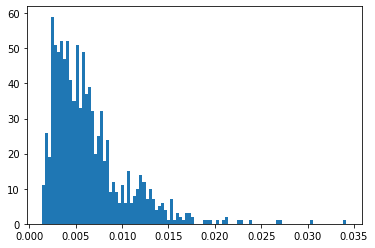

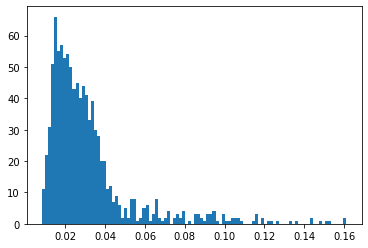

In [5]:
all_scores_std = scores[0]
all_scores_max = scores[1]

plt.hist(all_scores_std, bins=100)
plt.show()

plt.hist(all_scores_max, bins=100)
plt.show()

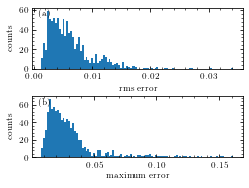

In [14]:
####################################################
####################################################
####################################################

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 9
fig = plt.figure(figsize=(3.40457,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.hist(all_scores_std, bins=100)

plt.xlabel(r'rms error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.hist(all_scores_max, bins=100)

plt.xlabel(r'maximum error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.subplots_adjust(left=0.11, bottom=0.14, right=0.97, top=0.97, wspace=0.08, hspace=0.45)


plt.savefig('/home/agluedge/Preprints/ELPH/figs/pred_error_statistics.pdf')
plt.show()